Análisis 1D --- Caracterización de los Datos
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]()

## Introducción

**Qué es?**

Es una aproximación metodológica y filosófica para organizar, graficar y resumir los datos, de tal forma que se puedan resolver **preguntas de interés**.

El análisis exploratorio de datos busca:

* Mejorar la comprensión y aumentar el conocimiento.

* Generar y confirmar una o más hipótesis.

* Construir una intuición y ganar insights sobre los datos.

* Formular conclusiones válidas.

* Ayudar en análisis de decisiones y planeamiento.

* Ayudar en análisis causal.

**Proceso metodológico.**

* **Fase Previa**: ingestión y limpieza de datos.

* Exploración 1-D.

* Exploración 2-D.

* Exploración N-D.

* Análisis Factorial.

* Clustering.

* Selección de Características.

* Ingeniería de Características.

* **Fase Posterior:** Sintetización, comunicación y decisión.

## Definiciones y conceptos básicos

![assets/pob-muestra.jpg](assets/pob-muestra.jpg)

**Análisis exploratorio de datos**. En el análisis exploratorio de datos se busca obtener información de interés de la población a partir de una muestra que es representativa de la población. En términos más formales, se usa para generar hipótesis sobre los datos, tales como:

* Ubicación del centro de los datos.

* Dispersión de los datos.

* Distribución de probabilidades de los datos.

* Relaciones entre los datos.

Uno de los objetivos fundamentales en estadística es estimar el valor de un parámetro de la población mediante un estadístico calculado sobre la muestra. 

Existen dos aproximaciones para estimar características de la población:

* Estimación de intervalos de confianza: usualmente para estadísticos calculados sobre la muestra de datos.  

* Pruebas de hipótesis: para propiedades más complejas de la población, como por ejemplo su distribución de probabilidades o relaciones de dependencia entre variables.

**Población**: Colección de objetos o individuos sobre los cuales se desea obtener información de interés.

**Parámetro:** Un número que resume una propiedad o característica de la población entera. 

**Muestra:** Grupo obtenido aleatoriamente que es representativo de la población.

**Estadístico:** Un número que resume una propiedad o característica de la muestra. 

**Tipos de datos:** Los tipos de datos son los siguientes:

* Continuos (flotante, numérico)
* Discretos (enteros)
* Categóricos (enumeraciones, fctores, valores nominales).
* Binarios (Indicadores, lógicos)
* Ordinales (Categóricos con un ordenamiento explícito, factores ordenados).

**Datos rectagulares:** Datos organizados en una tabla.

* Feature: característica, atributo, entrada, predictor, variable independiente.
* Outcome: resultado, variable dependiente, respuesta, objetivo, salida.
* Registro: fila en una tabla de datos, también conocida como caso, ejemplo, instancia, observación, patrón o muestra.


## Caracterización de los datos

Medidas de tendencia central y dispesión:

* Concentración local: media, moda, mediana, quartiles.

* Dispersión: desviación estándar, varianza.

* Forma: Curtosis y asimetría.

## Carga de los datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#
# Para ejemplificar se usará la base de datos del Iris
#
data = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/iris.csv"
)

data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Medidas de concentración local

**Media o promedio muestral:**

Valor "típico" de los datos.

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$

In [9]:
#
# Cálculo para cada una de las columnas del
# dataframe
#
from statistics import mean

display(
    data.Sepal_Length.mean(),
    mean(data.Sepal_Length),
    np.mean(data.Sepal_Length)
)

5.843333333333334

5.843333333333334

5.843333333333334

In [4]:
#
# Cálculo para las columnas numéricas del
# dataframe
#
data.mean()

Sepal_Length    5.843333
Sepal_Width     3.057333
Petal_Length    3.758000
Petal_Width     1.199333
dtype: float64

**Media ponderada:** 

$$\bar{x} = \frac{1}{\sum_{i=1}^n w_i} \sum_{i=1}^n w_i x_i$$

**Outlier o valor atípico:** 

Valores extremadamente distantes del resto de los datos. En algunos casos se pueden definir en términos de la media y la desviación estándar de la muestra; por ejemplo, se considera outliers aquellas observaciones distantes más de 3.5$\sigma$ de la media. 

**Media truncada:** 

Se calcula la media sobre los datos después de eliminar los $p$ datos más pequeños y los $p$ datos más grandes. Si $x_{(1)}$, $x_{2}$, ..., $x_{(n)}$ representan los datos ordenados, donde $x_{(1)}$ es el dato más pequeño y $x_{(n)}$ el más grande, entonces la media truncada se calcula como:

$$\frac{1}{n-2p} \sum_{i=1+p}^{n-p} x_i$$

**Mediana:** 

Es el valor $x_{((n+1)/2)}$ cuando se ordenan los datos. Es una aproximación robusta (no influenciada por datos atípicos o distribuciones asimétricas.

In [13]:
from statistics import median

display(
    data.Sepal_Length.median(),
    median(data.Sepal_Length),
    np.median(data.Sepal_Length),
)

5.8

5.8

5.8

In [6]:
df.median()

Sepal_Length    5.80
Sepal_Width     3.00
Petal_Length    4.35
Petal_Width     1.30
dtype: float64

**Moda:**

In [10]:
from statistics import mode
from scipy import stats

display(
    data.Sepal_Length.mode(),
    mode(data.Sepal_Length),
    stats.mode(data.Sepal_Length),
)

0    5.0
dtype: float64

5.0

ModeResult(mode=array([5.]), count=array([10]))

## Medidas de Dispersión

Son una medida de dispersión o variabiilidad de los datos, y a como se distribuyen los datos.

**Desviación:** 

Diferencia entre el valor observado y el valor estimado de localización. En modelado sus sinónimos son errores o residuales.

**Rango:** 

Diferencia entre el valor más grande y más pequeño de la muestra de los datos.

**Varianza muestral:**

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$

In [5]:
from statistics import variance

display(
    data.Sepal_Length.var(),
    variance(data.Sepal_Length),
    np.var(data.Sepal_Length),
)

0.6856935123042507

0.6856935123042506

0.6811222222222223

**Desviación estándar muestral**.

Raíz cuadrada de la varianza muestral.

In [24]:
from statistics import stdev

display(
    data.Sepal_Length.std(),
    stdev(data.Sepal_Length),
    np.std(data.Sepal_Length),
)

0.828066127977863

0.8280661279778629

0.8253012917851409

In [17]:
df.std()

Sepal_Length    0.828066
Sepal_Width     0.435866
Petal_Length    1.765298
Petal_Width     0.762238
dtype: float64

**Desviación media absoluta (MAD):**

Norma L1 o distancia de Manhattan.

$$\text{MAD} = \frac{1}{n} \sum_{i=1}^n |x_i - \bar{x}|$$

In [19]:
df.mad()

Sepal_Length    0.687556
Sepal_Width     0.336782
Petal_Length    1.562747
Petal_Width     0.658133
dtype: float64

**Desviación absoluta de la mediana:** 

Ya que la varianza y la desviación media absoluta no son robusta a outliers, se puede realizar un estimado de la desviación usando la mediana $m$ de la muestra:

$$\text{Mediana}(|x_1 - m|,\; |x_2 - m|,\;...,\;|x_n - m|)$$ 


También es posible computar la varianza muestral truncada en analogía a la media truncada.

In [21]:
def madm(df):
    d = df._get_numeric_data().copy()
    m = d.median()
    for c in d.columns:
        d[c] = d[c] - m[c]
    return d.mad()


madm(df)

Sepal_Length    0.687556
Sepal_Width     0.336782
Petal_Length    1.562747
Petal_Width     0.658133
dtype: float64

**Estadísticos de orden:** Métricas calculadas sobre los datos ordenados.

* **Percentil** $p$: Valor para el cual el $p$ por ciento de los datos son menores o iguales. 

* **decil** $d$: Valor para el cual el $d$ por ciento de los datos son menores o iguales. $d$ es un múltiplo de 10.

* **Cuartil inferior:** Valor para el cual el 25% de las observaciones son más pequeñas (percentil del 25%).

* **Cuartil superior:** Valor para el cual el 25% de las observaciones son más grandes (percentil del 75%).

* **Rango intercuartil (IQR):**

$$\text{IQR} = \text{Cuartil superior} - \text{Cuartil inferior}$$

## Médidas de Forma

In [6]:
from scipy.stats import skew

display(
    data.Sepal_Length.skew(),
    skew(data.Sepal_Length),
)

0.3149109566369728

0.3117530585022963

In [7]:
from scipy.stats import kurtosis

display(
    data.Sepal_Length.kurt(),
    kurtosis(data.Sepal_Length),
)

-0.5520640413156395

-0.5735679489249765

**Coeficiente de variación (CV):**

$$\text{CV} = 100 \times \frac{s}{\bar{x}}$$

In [28]:
100 * df.std() / df.mean()

Sepal_Length    14.171126
Sepal_Width     14.256420
Petal_Length    46.974407
Petal_Width     63.555114
dtype: float64

## Método describe

In [26]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualización

In [31]:
#
# El método describe de pandas computa los 
# principales estadísticos para las columnas
# numéricas del dataframe
#
data.Sepal_Length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal_Length, dtype: float64

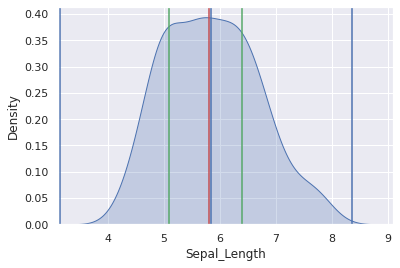

In [35]:
descriptive_stats = data.Sepal_Length.describe()

q75 = data.Sepal_Length.describe()['75%']
q25 = data.Sepal_Length.describe()['25%']
iqr = q75 - q25

upper_outliers = q75 + 1.5 * iqr
lower_outliers = q25 - 1.5 * iqr

sns.set(color_codes=True)

sns.kdeplot(data['Sepal_Length'], shade=True)
plt.axvline(data.Sepal_Length.mean())
plt.axvline(data.Sepal_Length.median(), color='r')
plt.axvline(q25, color='g')
plt.axvline(q75, color='g')
plt.axvline(upper_outliers, color = 'b')
plt.axvline(lower_outliers, color = 'b')
plt.show()